# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных: 
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
-*floors_total* — всего этажей в доме
-*is_apartment* — апартаменты (булев тип)
-*kitchen_area* — площадь кухни в квадратных метрах (м²)
-*last_price* — цена на момент снятия с публикации
-*living_area* — жилая площадь в квадратных метрах(м²)
-*locality_name* — название населённого пункта
-*open_plan* — свободная планировка (булев тип)
-*parks_around3000* — число парков в радиусе 3 км
-*parks_nearest* — расстояние до ближайшего парка (м)
-*ponds_around3000* — число водоёмов в радиусе 3 км
-*ponds_nearest* — расстояние до ближайшего водоёма (м)
-*rooms* — число комнат
-*studio* — квартира-студия (булев тип)
-*total_area* — площадь квартиры в квадратных метрах (м²)
-*total_images* — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

открываем файл и анализируем базовую информацию о данных

In [1]:

import pandas as pd
real_estate = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

display(real_estate)
real_estate.info()
print(real_estate.describe())

for i in real_estate.columns:
    print()
    print("В колонке  {} зафиксированы следующие уникальные значения: {}.".format(i, real_estate[i].unique()))
    
    


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

проверяем данные на соответствие здравой логике

In [2]:
display(real_estate.query("ponds_nearest>3000"))# проверка нет ли прудов дальше 3 км, что пртиворечит условию
display(real_estate.query("parks_nearest >3000"))# проверка нет ли парков дальше 3 км, что пртиворечит условию
display(real_estate[real_estate['floor']>real_estate['floors_total']])# проверка не указан ли этаж выше максимального 
print(real_estate[real_estate['living_area']>real_estate['total_area']])#проверка не указана ли жилая зона больше общей площади
print(real_estate[real_estate['kitchen_area']>real_estate['total_area']])#проверка не указана ли кухня больше общей площади

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1590,3,7500000.0,70.0,2017-07-11T00:00:00,2,NaN,18.0,37.0,13,NaN,...,10.0,0.0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3000000.0,31.1,2017-03-21T00:00:00,1,NaN,5.0,17.7,2,NaN,...,5.5,0.0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14950000.0,187.0,2017-10-12T00:00:00,5,3.0,2.0,80.0,2,NaN,...,17.0,1.0,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3900000.0,30.5,2018-02-22T00:00:00,1,2.6,5.0,16.5,1,NaN,...,5.5,NaN,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


### Вывод

1) методом info() было выявлено общее число пропусков и классы переменных
2) было проверенно что данные соответствуют здравой логике:
*нет  прудов дальше 3 км, что пртиворечит условию
*нет  парков дальше 3 км, что пртиворечит условию
*не указан  этаж выше максимального 
*не указана  жилая зона больше общей площади
*не указана  кухня больше общей площади
3) были рассмотрены уникальные значения и выявлены неадекватные величины

### Шаг 2. Предобработка данных

заполняем пропуски в графе апартамены по принципу:
если это апартаменты, то продавец об этом знает и укажет эти данные
в противном случае полагаем, что это не апартаменты и строку оставили пустой

In [3]:
real_estate['is_apartment']=real_estate['is_apartment'].fillna(0)
real_estate['is_apartment']=real_estate['is_apartment'].astype(bool)

примем, что если балкон не заполнен, то его просто нет, и продавец оставил эту строчку пустой

In [4]:

real_estate['balcony']=real_estate['balcony'].fillna(0)

проверяем предположение, что если не указано количество этажей в доме, то это частный сектор, указанный как апартаменты
и это предположение не оправдывается, т.к. апартаменты почти всегда расположены на разных этажах

In [5]:
print(real_estate.query('floors_total.isnull()==True').pivot_table(index="floor",values="is_apartment",aggfunc='count'))

       is_apartment
floor              
1                 3
2                 2
3                 4
4                10
5                 4
6                 9
7                 4
8                 8
9                 5
10                3
11                3
12                6
13                3
14                2
15                3
17                1
18                3
19                3
20                2
21                4
22                1
23                1
24                2


мы видели в наших данные неадекватные значения высоты потолков. Возможно, они сдают машинный зал Каширской ГРЭС, но скорее всего это выбросы данных.
этих значений меньше одного процента, и мы можем от них избавиться
отстроимся от значения 4 метра ( вдруг кто-то продает дворец)

In [6]:
display(real_estate.query("ceiling_height>4"))
real_estate=real_estate[~(real_estate["ceiling_height"]>4)]
real_estate.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3.0,44.2,2,False,...,12.2,0.0,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.20,8.0,159.5,7,False,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,False,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,NaN,1,False,...,NaN,0.0,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.30,16.0,15.5,15,False,...,NaN,0.0,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.00,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22494,7,91075000.0,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,False,...,45.0,0.0,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,115.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.00,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23624 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23624 non-null int64
last_price              23624 non-null float64
total_area              23624 non-null float64
first_day_exposition    23624 non-null object
rooms                   23624 non-null int64
ceiling_height          14429 non-null float64
floors_total            23538 non-null float64
living_area             21727 non-null float64
floor                   23624 non-null int64
is_apartment            23624 non-null bool
studio                  23624 non-null bool
open_plan               23624 non-null bool
kitchen_area            21359 non-null float64
balcony                 23624 non-null float64
locality_name           23575 non-null object
airports_nearest        18099 non-null float64
cityCenters_nearest     18119 non-null float64
parks_around3000        18120 non-null float64
parks_nearest           8042 non-null float64
ponds_around3000

есть помещения в которых нуль комнат
таких данных меньше одного процента, и мы смело их выкидываем

<font color=green> Согласись, когда код разбит на ячейки, то структура работы начинает лучше проследиваться. Информация подается по частям, а не вся вместе.  
    
---

In [7]:
display(real_estate[real_estate['rooms']==0])
real_estate=real_estate[~(real_estate['rooms']==0)]
real_estate.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23429 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23429 non-null int64
last_price              23429 non-null float64
total_area              23429 non-null float64
first_day_exposition    23429 non-null object
rooms                   23429 non-null int64
ceiling_height          14349 non-null float64
floors_total            23346 non-null float64
living_area             21546 non-null float64
floor                   23429 non-null int64
is_apartment            23429 non-null bool
studio                  23429 non-null bool
open_plan               23429 non-null bool
kitchen_area            21359 non-null float64
balcony                 23429 non-null float64
locality_name           23380 non-null object
airports_nearest        17982 non-null float64
cityCenters_nearest     18002 non-null float64
parks_around3000        18003 non-null float64
parks_nearest           8014 non-null float64
ponds_around3000

заполним пропуски значений данных жилой зоны
найдем медианное значение жилой зоны в зависимости от количества комнат и смержим их в наш датасет

In [8]:

rooms_area=real_estate[real_estate['living_area'].isnull()==False].pivot_table(index='rooms',values='living_area',aggfunc="median").reset_index()
merged_rooms_area=real_estate.loc[real_estate['living_area'].isnull(),['rooms']].merge(rooms_area, how='left',left_on=['rooms'], right_on=['rooms'])
real_estate.loc[real_estate['living_area'].isnull(),['living_area']]=list(merged_rooms_area['living_area'])
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23429 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23429 non-null int64
last_price              23429 non-null float64
total_area              23429 non-null float64
first_day_exposition    23429 non-null object
rooms                   23429 non-null int64
ceiling_height          14349 non-null float64
floors_total            23346 non-null float64
living_area             23429 non-null float64
floor                   23429 non-null int64
is_apartment            23429 non-null bool
studio                  23429 non-null bool
open_plan               23429 non-null bool
kitchen_area            21359 non-null float64
balcony                 23429 non-null float64
locality_name           23380 non-null object
airports_nearest        17982 non-null float64
cityCenters_nearest     18002 non-null float64
parks_around3000        18003 non-null float64
parks_nearest           8014 non-null float64
ponds_around3000

согласно статье 15 ЖК РФ балконы и лоджии не входят в общую площадь. Кухни жилой площадбю не являются.
В этом случае площадь кухни равна разности общей площади и жилой зоны
заполним пропуски расчетной величиной

In [9]:

kitchen=real_estate.loc[real_estate['kitchen_area'].isnull(),['total_area','living_area']]
real_estate.loc[real_estate['kitchen_area'].isnull(),['kitchen_area']]=list(kitchen['total_area']-kitchen['living_area'])
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23429 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23429 non-null int64
last_price              23429 non-null float64
total_area              23429 non-null float64
first_day_exposition    23429 non-null object
rooms                   23429 non-null int64
ceiling_height          14349 non-null float64
floors_total            23346 non-null float64
living_area             23429 non-null float64
floor                   23429 non-null int64
is_apartment            23429 non-null bool
studio                  23429 non-null bool
open_plan               23429 non-null bool
kitchen_area            23429 non-null float64
balcony                 23429 non-null float64
locality_name           23380 non-null object
airports_nearest        17982 non-null float64
cityCenters_nearest     18002 non-null float64
parks_around3000        18003 non-null float64
parks_nearest           8014 non-null float64
ponds_around3000

Заполним пропуски количества этажей в доме исходя из логики, что медианная высота здания зависит от населенного пунката

In [10]:
floors_total_median=real_estate[real_estate['floors_total'].isnull()==False].pivot_table(index='locality_name',values='floors_total',aggfunc="median").reset_index()
merged_floors_total=real_estate.loc[real_estate['floors_total'].isnull(),['locality_name']].merge(floors_total_median, how='left',left_on=['locality_name'], right_on=['locality_name'])
real_estate.loc[real_estate['floors_total'].isnull(),['floors_total']]=list(merged_floors_total['floors_total'])
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23429 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23429 non-null int64
last_price              23429 non-null float64
total_area              23429 non-null float64
first_day_exposition    23429 non-null object
rooms                   23429 non-null int64
ceiling_height          14349 non-null float64
floors_total            23428 non-null float64
living_area             23429 non-null float64
floor                   23429 non-null int64
is_apartment            23429 non-null bool
studio                  23429 non-null bool
open_plan               23429 non-null bool
kitchen_area            23429 non-null float64
balcony                 23429 non-null float64
locality_name           23380 non-null object
airports_nearest        17982 non-null float64
cityCenters_nearest     18002 non-null float64
parks_around3000        18003 non-null float64
parks_nearest           8014 non-null float64
ponds_around3000

Заполним пропуски высоты потолков исходя из логики, что медианная высота потолка зависит от типа застройки.  А тип застройки зависит от нселенного пункта.

In [11]:
ceiling_height_median=real_estate[real_estate['ceiling_height'].isnull()==False].pivot_table(index='locality_name',values='ceiling_height',aggfunc="median").reset_index()
merged_ceiling_height=real_estate.loc[real_estate['ceiling_height'].isnull(),['locality_name']].merge(ceiling_height_median, how='left',left_on=['locality_name'], right_on=['locality_name'])
real_estate.loc[real_estate['ceiling_height'].isnull(),['ceiling_height']]=list(merged_ceiling_height['ceiling_height'])
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23429 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23429 non-null int64
last_price              23429 non-null float64
total_area              23429 non-null float64
first_day_exposition    23429 non-null object
rooms                   23429 non-null int64
ceiling_height          23271 non-null float64
floors_total            23428 non-null float64
living_area             23429 non-null float64
floor                   23429 non-null int64
is_apartment            23429 non-null bool
studio                  23429 non-null bool
open_plan               23429 non-null bool
kitchen_area            23429 non-null float64
balcony                 23429 non-null float64
locality_name           23380 non-null object
airports_nearest        17982 non-null float64
cityCenters_nearest     18002 non-null float64
parks_around3000        18003 non-null float64
parks_nearest           8014 non-null float64
ponds_around3000

проверим нет ли дубликатов данных.
как видно - нет

In [12]:

real_estate.drop_duplicates(keep = 'first', inplace = True)
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23429 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23429 non-null int64
last_price              23429 non-null float64
total_area              23429 non-null float64
first_day_exposition    23429 non-null object
rooms                   23429 non-null int64
ceiling_height          23271 non-null float64
floors_total            23428 non-null float64
living_area             23429 non-null float64
floor                   23429 non-null int64
is_apartment            23429 non-null bool
studio                  23429 non-null bool
open_plan               23429 non-null bool
kitchen_area            23429 non-null float64
balcony                 23429 non-null float64
locality_name           23380 non-null object
airports_nearest        17982 non-null float64
cityCenters_nearest     18002 non-null float64
parks_around3000        18003 non-null float64
parks_nearest           8014 non-null float64
ponds_around3000

### Шаг 3. Посчитайте и добавьте в таблицу

переведем столбец с датой в формат datetime
создадим столбец с месяцом размещения объявления
создадим столбец с годом размещения объявления

In [13]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
real_estate['month']=real_estate['first_day_exposition'].dt.month 
real_estate['year']=real_estate['first_day_exposition'].dt.year

создадим столбец с днем недели размещения объявления
создадим столбец расшифровки дня недели

In [14]:
df = pd.DataFrame({
     'weekday': [0, 1, 2, 3,4,5,6],
     'weekday_name': ["понедельник", "вторник", "среда", "четверг","пятница","суббота","воскресение"]})
real_estate['weekday']=real_estate['first_day_exposition'].dt.weekday
merged_days=real_estate.merge(df, how='left',left_on=['weekday'], right_on=['weekday'])
real_estate['weekday_name']=merged_days['weekday_name']

создадим столбец цены квадратного метра 

In [15]:

real_estate["price_meter"]=(real_estate["last_price"]/real_estate["total_area"]).round(2)

создадим столбец отношения жилой зоны к общей площади

In [16]:

real_estate["living/total"]=((real_estate["living_area"]/real_estate["total_area"])*100).round(2)

создадим столбец отношения кухни к общей площади

In [17]:
real_estate["kitchen/total"]=((real_estate["kitchen_area"]/real_estate["total_area"])*100).round(2)

создаем столбец, который делит наши квартиры на три категории относительно этажа

In [18]:
real_estate["flat_floor"]="Другой"
real_estate["flat_floor"]=real_estate["flat_floor"].where(real_estate["floor"] != 1, 'Первый')
real_estate["flat_floor"]=real_estate["flat_floor"].where(real_estate["floor"] != real_estate["floors_total"], 'Последний')
display(real_estate)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,month,year,weekday,weekday_name,price_meter,living/total,kitchen/total,flat_floor
0,20,13000000.0,108.00,2019-03-07,3,2.700,16.0,51.0,8,False,...,755.0,NaN,3,2019,3,четверг,120370.37,47.22,23.15,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.615,11.0,18.6,1,False,...,NaN,81.0,12,2018,1,вторник,82920.79,46.04,27.23,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.700,5.0,34.3,4,False,...,574.0,558.0,8,2015,3,четверг,92785.71,61.25,14.82,Другой
3,0,64900000.0,159.00,2015-07-24,3,2.700,14.0,45.0,9,False,...,234.0,424.0,7,2015,4,пятница,408176.10,28.30,71.70,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.030,14.0,32.0,13,False,...,48.0,121.0,6,2018,1,вторник,100000.00,32.00,41.00,Другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.700,5.0,73.3,3,False,...,381.0,NaN,3,2017,1,NaN,72490.85,54.78,10.34,Другой
23695,14,3100000.0,59.00,2018-01-15,3,2.500,5.0,38.0,4,False,...,NaN,45.0,1,2018,0,NaN,52542.37,64.41,14.41,Другой
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,NaN,2,2018,6,NaN,44091.71,52.38,47.62,Первый
23697,13,11475000.0,76.75,2017-03-28,2,3.000,17.0,30.5,12,False,...,196.0,602.0,3,2017,1,NaN,149511.40,39.74,30.36,Другой


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

Определим функцию, расчитывающую интервалы построения графиков

In [20]:
def IQR_FUNC(df):
    Q1=df.quantile(.25)
    Q3=df.quantile(.75)
    IQR=Q3-Q1
    return Q1,Q3,IQR

опредилим функцию, строющую гистограммы по заданным данным

In [21]:
def flat_param(df):
    list=["total_area","last_price","rooms","ceiling_height"]
    for i in list:
        Q1,Q3,IQR=IQR_FUNC(df[i])
        df[i].plot(kind='hist', title=i, range=(Q1-3*IQR, Q3+3*IQR), bins=150,grid=True)
        plt.show()

Определим функцию, строющую боксплоты по заданным данным

In [22]:
def boxplot_show(df):
    list=["total_area","last_price","rooms","ceiling_height"]
    for i in list:
        Q1,Q3,IQR=IQR_FUNC(df[i])
        plt.ylim(Q1-3*IQR, Q3+3*IQR)
        df.boxplot(column =[i], grid = True)
        plt.show()

определим функцию, отображающую скатерплоты , матрицу кореляции и тепловую карту.

In [23]:
    
def real_estate_param(df):
    depend_price_1 = df[['last_price','total_area','rooms','cityCenters_nearest','flat_floor']]
    pd.plotting.scatter_matrix(depend_price_1, figsize=(30, 30))
    plt.show()

    depend_price_2 = df[['last_price','year','month','weekday']]
    pd.plotting.scatter_matrix(depend_price_2, figsize=(30, 30))
    plt.show()
    
    display(df.corr())
    plt.figure(figsize=(20,20))
    sns.heatmap(df.corr(), annot = True)

опеределим фуекцию, которая строит графики заданных велечин двух сравниваемых между собой датафреймов

In [24]:
def graf(df1,df2):
    list=['total_area','rooms','cityCenters_nearest','flat_floor','ceiling_height','kitchen/total']
    for i in list:
        plt.figure(figsize=(7,7))
        
        plt.subplot(121)
        plt.subplots_adjust(wspace=0.6, hspace=0)
        plt.plot( i, 'price_meter',linestyle='none', data=df1, marker='o', alpha=0.7)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('price_meter',fontsize=15)
        

        plt.subplot(122)
        plt.plot( i, 'price_meter',linestyle='none', data=df2, marker='o', alpha=0.7, color="orange")
        plt.xlabel(i,fontsize=15)
        plt.ylabel('price_meter',fontsize=15)
        plt.show()

строим гистрограммы и боксплоты для общих данных для того, чтобы подготовить статистически чистые данные
наши диаграммы должны стремиться к распределению Пуассона, а нормальные данные входить в область размаха боксплотов.

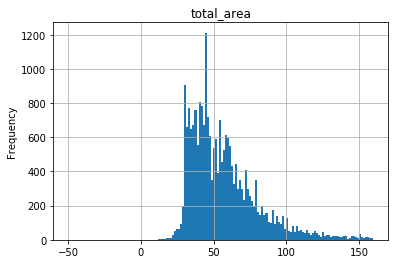

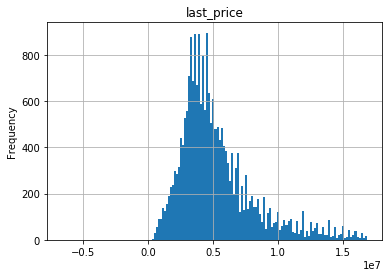

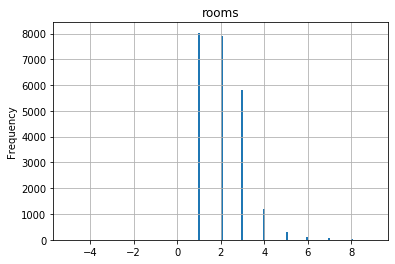

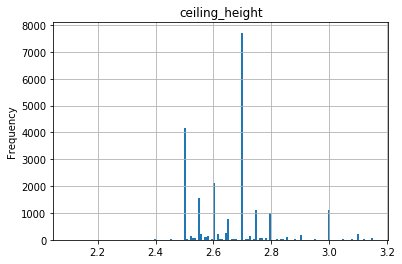

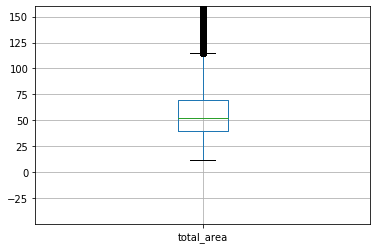

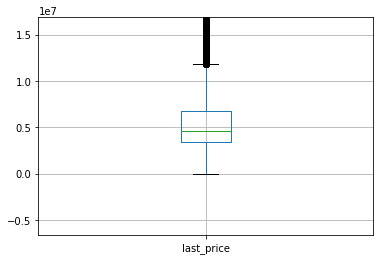

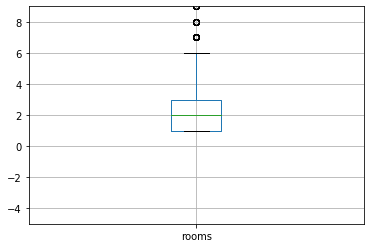

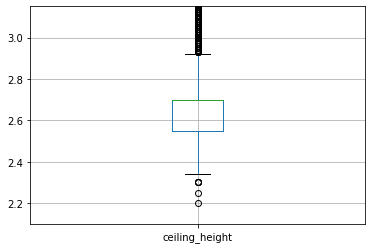

In [25]:

flat_param(real_estate) 
boxplot_show(real_estate)

область размаха усов боксплота от 12 до 115 кв м. отстроимся от этой величины. Числа больше 115 образуют длинный хвост. Это логично, так как метраж квартир крайне разнообразен. 

In [26]:
real_estate=real_estate.query('(total_area>12) and (total_area<115)')

область размаха усов боксплота от 0 до 12000000 млн . отстроимся от этой величины. Числа больше 12000000 образуют длинный хвост. Это логично, так как цена может стремиться к бесконечности. 

In [27]:
real_estate=real_estate.query('(last_price>12000000)')

 В советской хрущевке высота потолков примерно 2.5 метра. Все что ниже- не жилые помещения.
область размаха усов боксплота от 2.2 до 2.9 кв м. отстроимся от этой величины. значения ниже- выбросы.

In [28]:
real_estate=real_estate.query('(ceiling_height>=2.2)and (ceiling_height<3.2)')

построим гистограмму времени продажи и посмотрим результаты

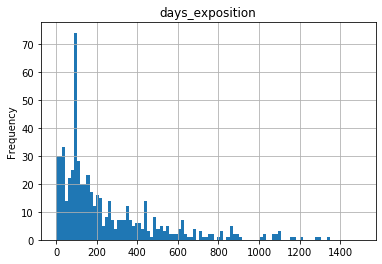

In [29]:

real_estate.loc[real_estate["days_exposition"].isnull()==False,"days_exposition"].plot(kind='hist', title="days_exposition", range=(0, 1500), bins=100,grid=True)
plt.show()

Большая часть объявлений закрывается втечение 200 дней. Полгода- разумный срок для продажи квартиры.

посчитаем медианное значение длительности заявки на продажу

In [30]:
median_days_exposition=real_estate["days_exposition"].median()
print(median_days_exposition)

147.5


посчитаем среднее значение длительности заявки на продажу

In [31]:
mean_days_exposition=real_estate["days_exposition"].mean()
print(mean_days_exposition)

248.55612244897958


теперь, когда данные подготовлены, посмотрим как наши величины коррелируют между собой

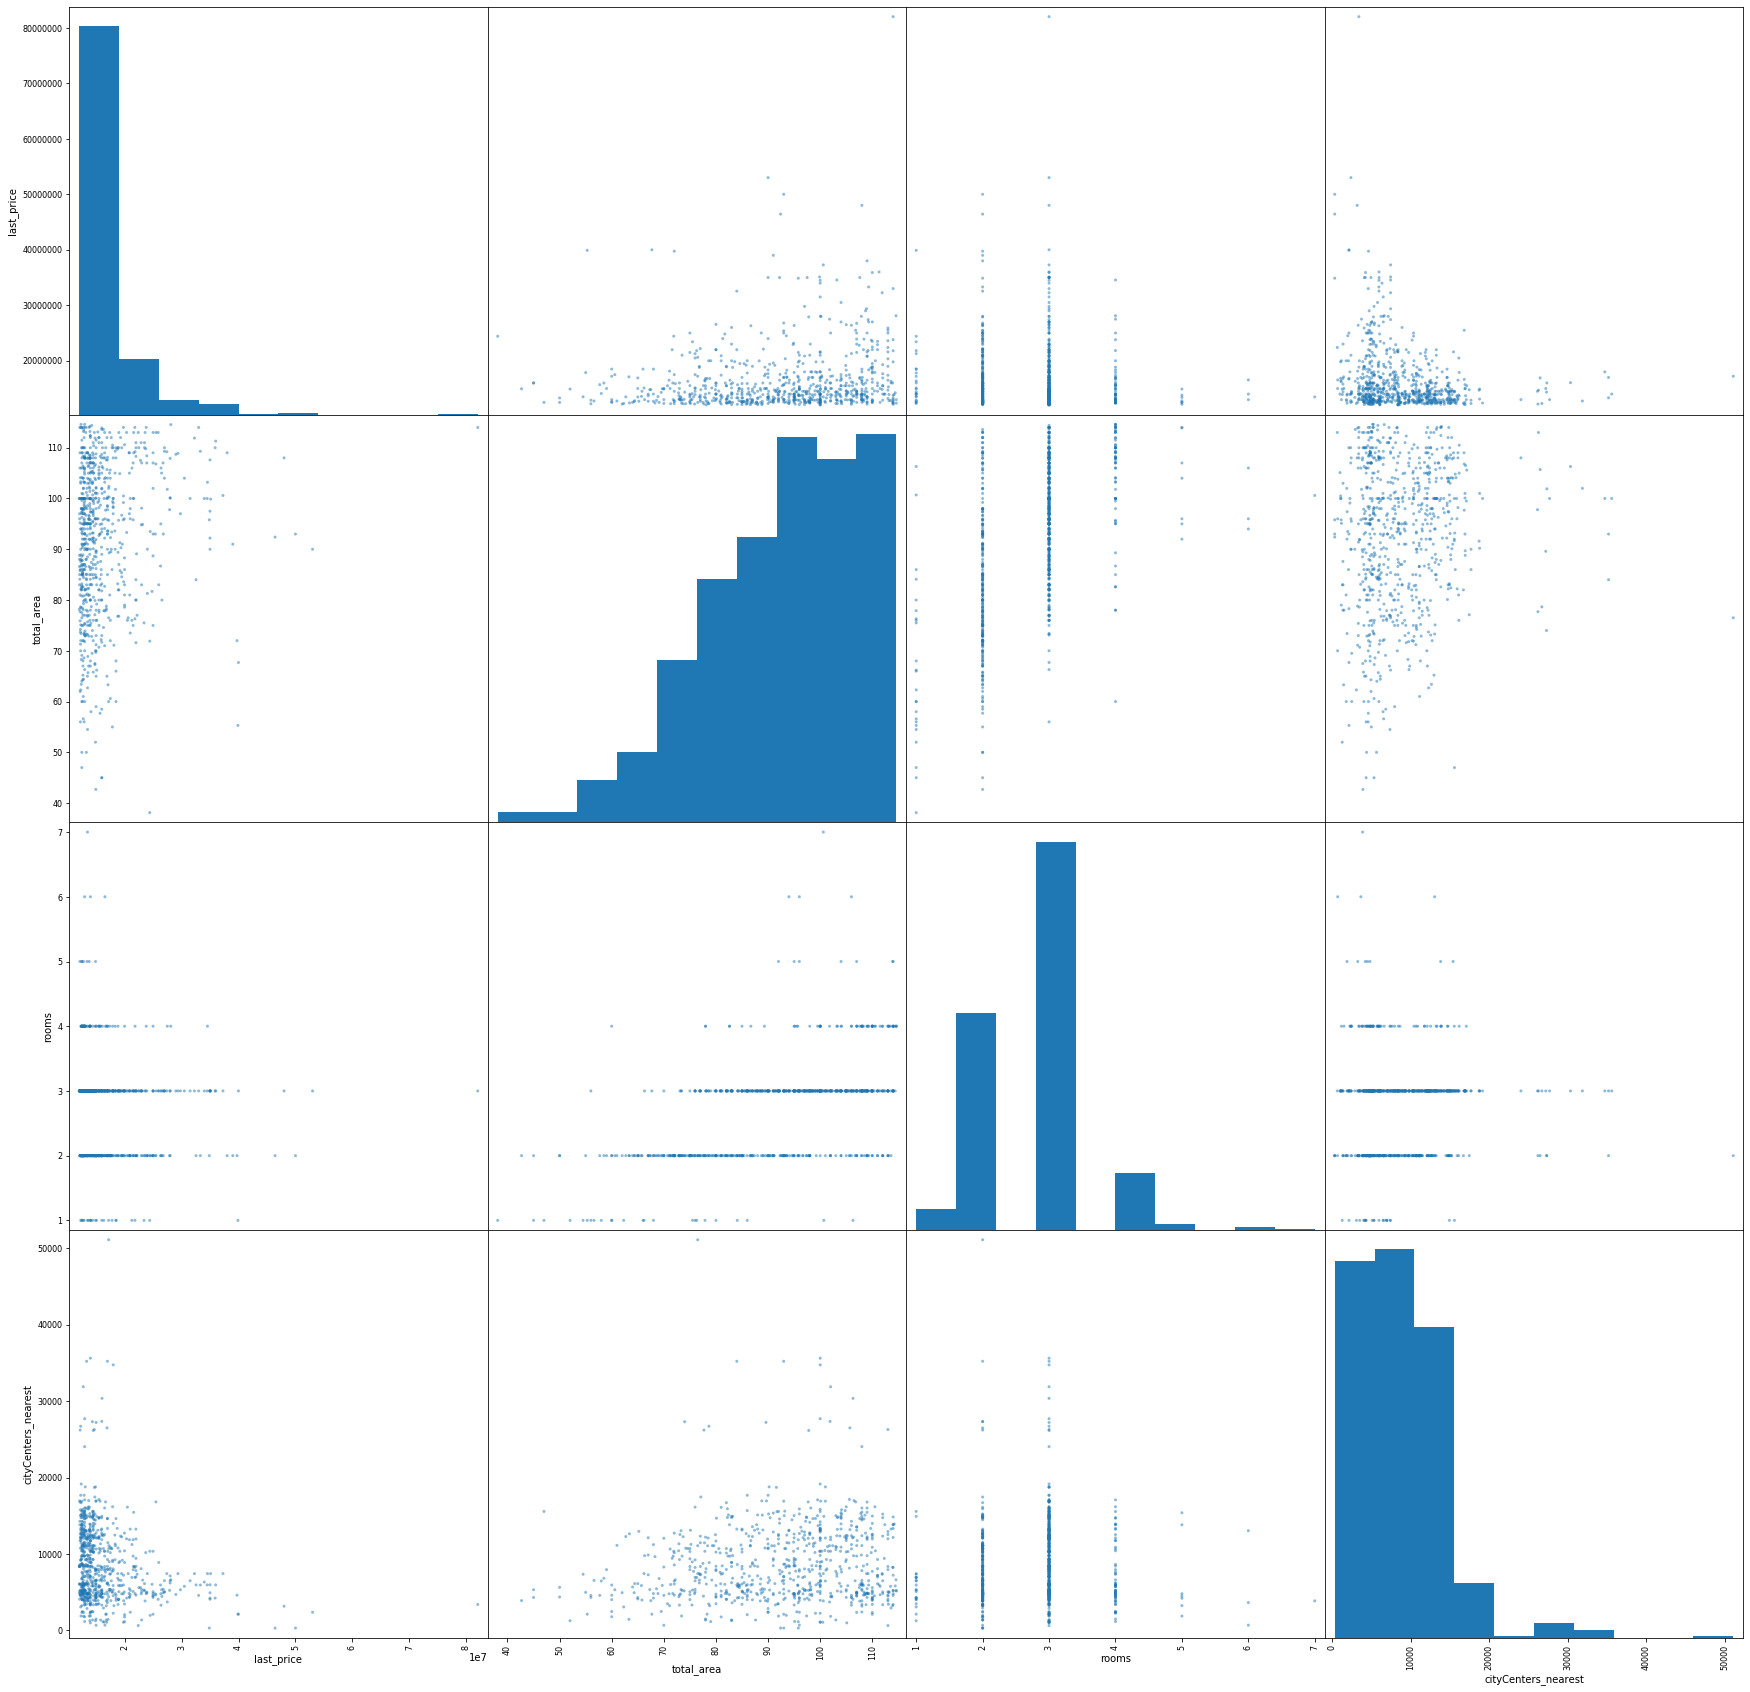

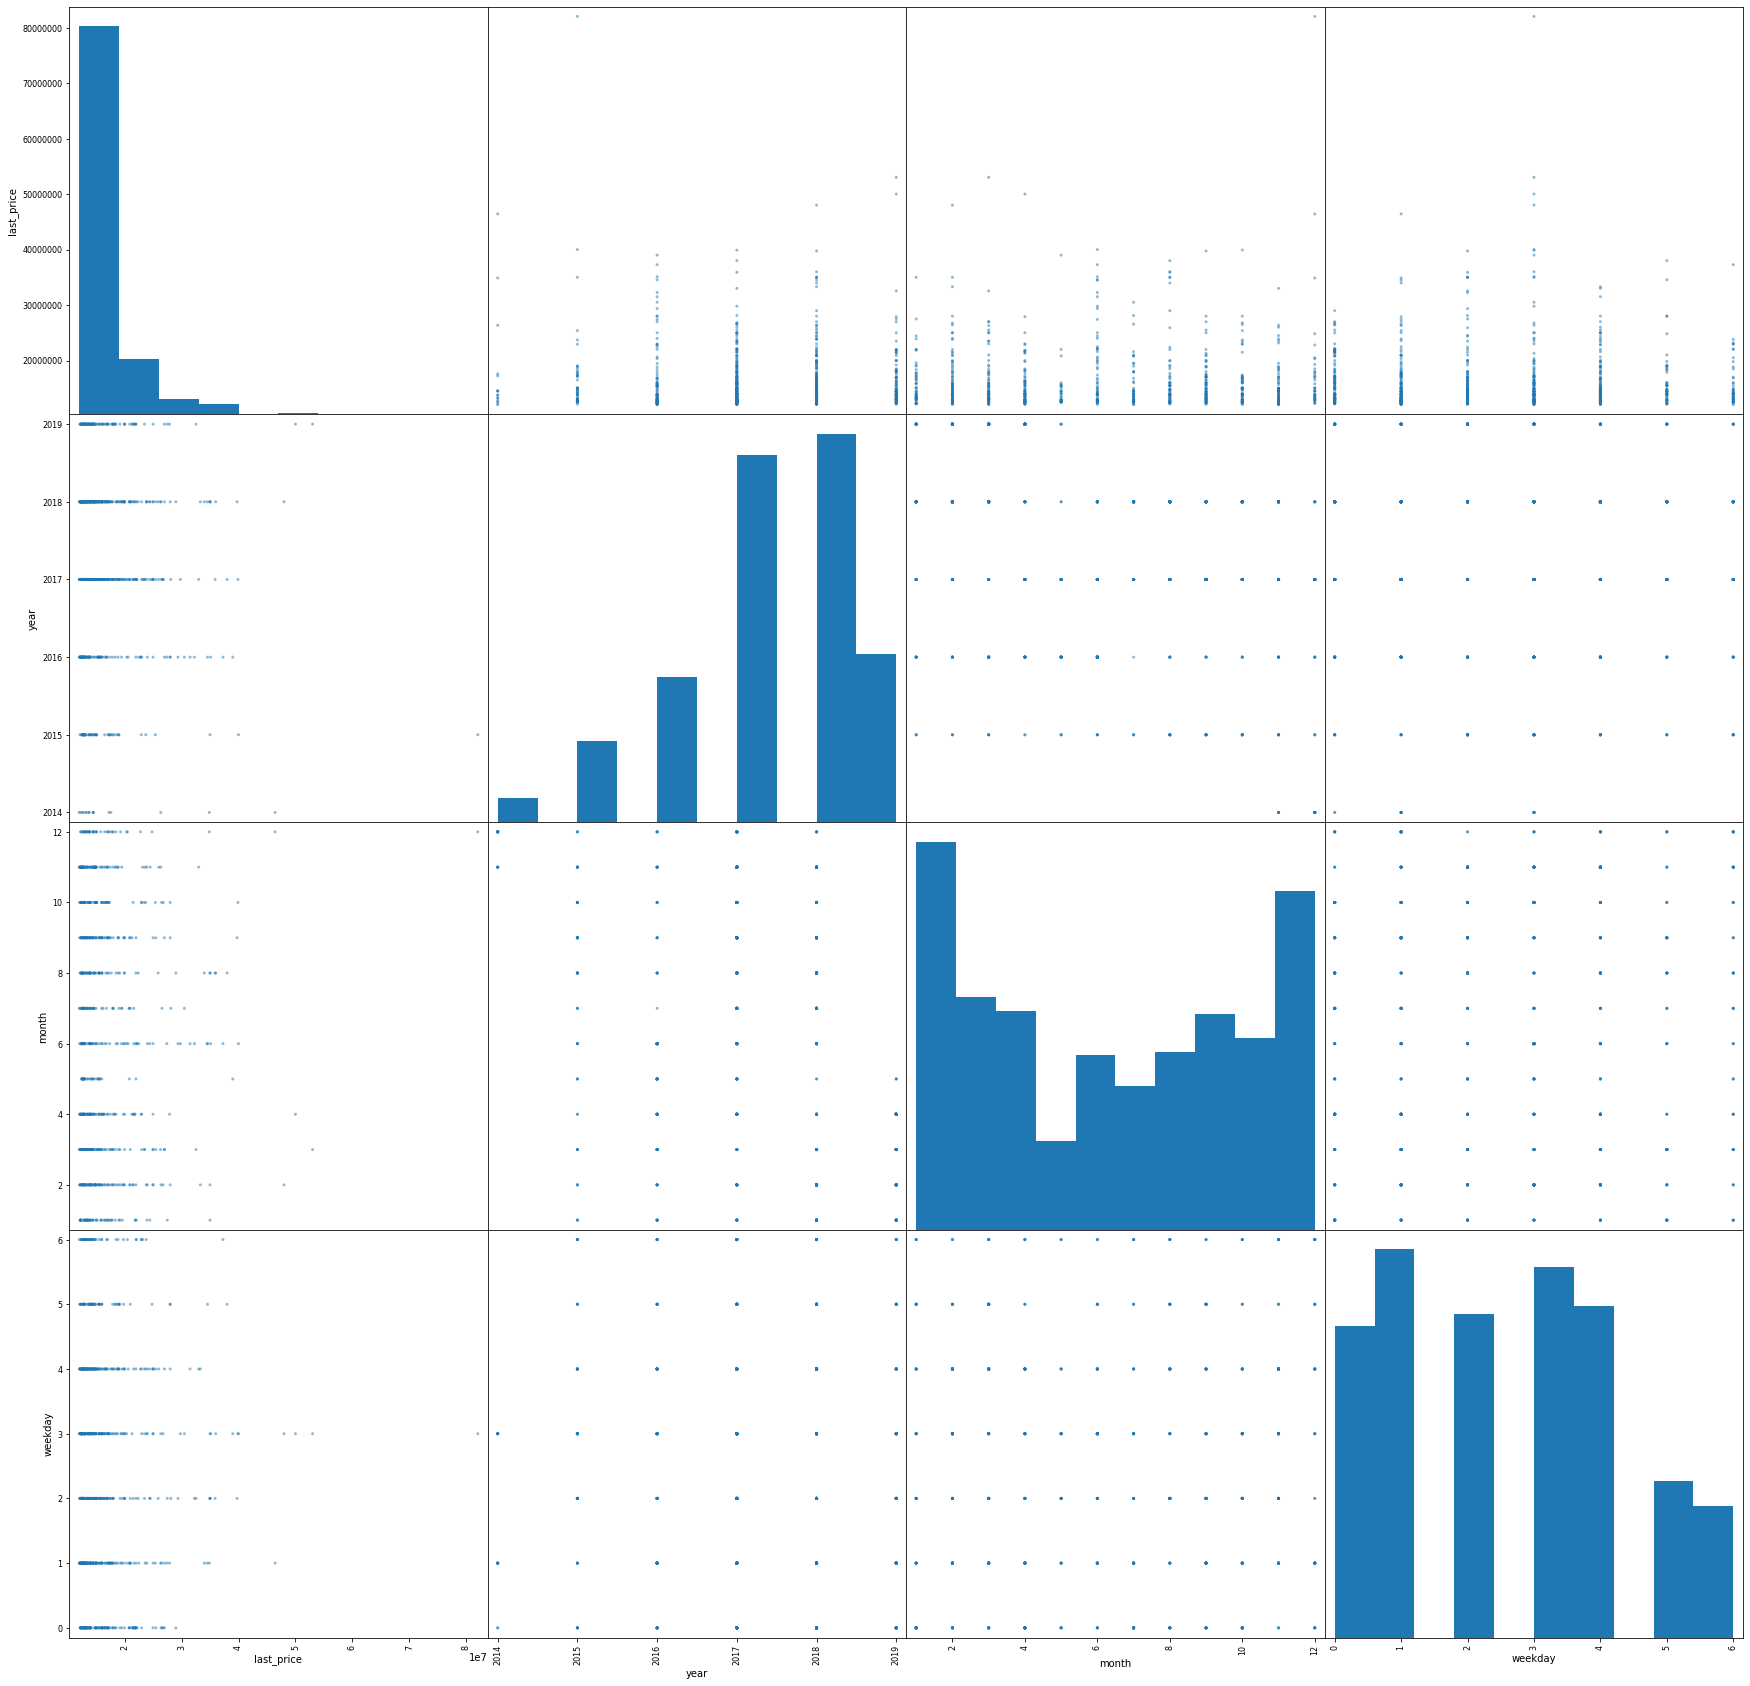

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,month,year,weekday,price_meter,living/total,kitchen/total
total_images,1.000000,-0.019918,0.043009,0.065531,-0.061078,0.156997,0.043089,0.095149,-0.032245,NaN,...,-0.006021,-0.131461,0.096418,-0.091277,0.000452,0.192193,-0.008837,-0.041114,0.027939,-0.059170
last_price,-0.019918,1.000000,0.143311,-0.080520,0.131930,-0.181901,0.041868,-0.100441,0.106314,NaN,...,-0.076298,0.179661,-0.052796,0.063940,-0.003356,-0.048440,0.004633,0.841971,-0.042466,0.065275
total_area,0.043009,0.143311,1.000000,0.530414,-0.082758,0.130371,0.597833,0.116009,0.025720,NaN,...,-0.043931,-0.153565,0.072350,0.089974,0.022951,-0.096739,0.036605,-0.361771,0.069574,-0.088371
rooms,0.065531,-0.080520,0.530414,1.000000,-0.165396,0.044761,0.730620,0.058967,0.071691,NaN,...,-0.083939,-0.097360,0.128905,-0.020539,0.017332,-0.020043,0.064794,-0.337398,0.556228,-0.341624
ceiling_height,-0.061078,0.131930,-0.082758,-0.165396,1.000000,-0.188530,-0.076750,-0.105054,-0.036229,NaN,...,0.009162,0.082314,-0.066388,0.076499,-0.017007,0.030820,-0.051023,0.164247,-0.039127,0.014510
floors_total,0.156997,-0.181901,0.130371,0.044761,-0.188530,1.000000,-0.038249,0.671303,-0.049720,NaN,...,-0.010831,-0.213604,0.042721,-0.046150,-0.018610,0.068367,0.001969,-0.229653,-0.132360,-0.011101
living_area,0.043089,0.041868,0.597833,0.730620,-0.076750,-0.038249,1.000000,-0.007369,0.134810,NaN,...,-0.120620,-0.044566,0.079940,0.041581,0.024519,-0.077489,0.017233,-0.251589,0.831762,-0.538856
floor,0.095149,-0.100441,0.116009,0.058967,-0.105054,0.671303,-0.007369,1.000000,-0.004975,NaN,...,-0.007783,-0.168322,-0.030940,-0.037549,-0.040135,0.049981,0.028517,-0.150725,-0.082232,-0.078816
is_apartment,-0.032245,0.106314,0.025720,0.071691,-0.036229,-0.049720,0.134810,-0.004975,1.000000,NaN,...,-0.037758,0.071715,0.005630,0.111718,0.088938,-0.074097,-0.013829,0.084182,0.143794,-0.106441
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


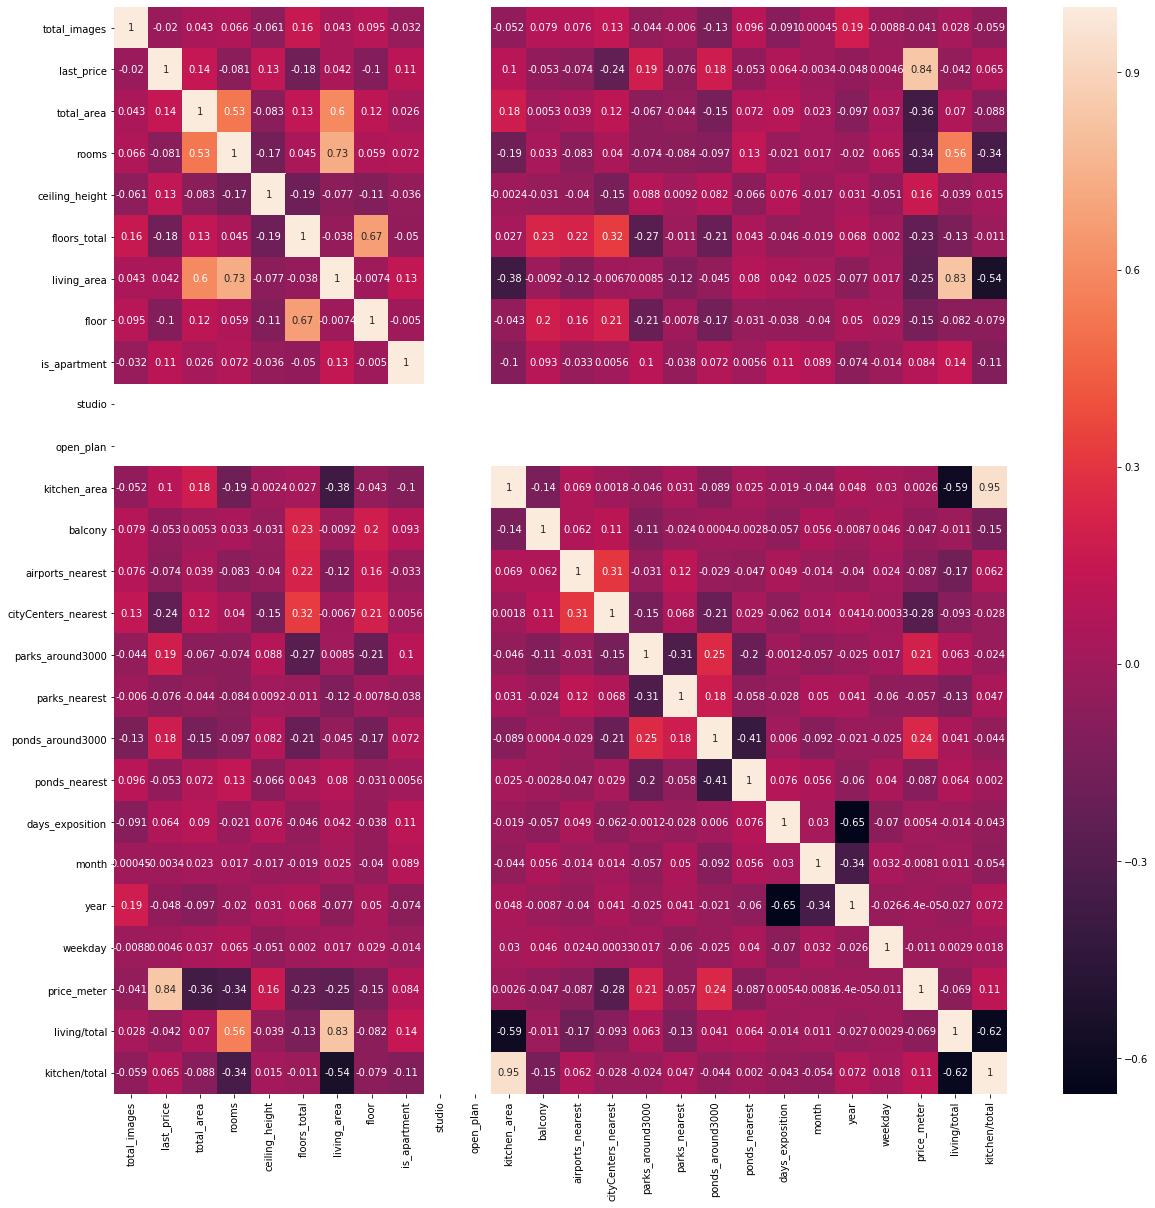

In [32]:
real_estate_param(real_estate)

Кореляция выглядит разумно. Общая площадь сильно взаимосвязана с количеством комнат и жилой зоной. Близость парков коррелирует с близостью прудов. Так же видно, что парки и пруды влияют на стоимость квартиры.

сгрупируем наши данные по городам и посмотрим среднюю цену и кол-во заявок в каждом населенном пункте

In [33]:
locality=real_estate.pivot_table( index= 'locality_name', aggfunc={'total_images':'count', 'price_meter':'mean'}).reset_index()
locality.rename(columns={'price_meter': 'mean_price', 'total_images': 'count'}, inplace=True)
display(locality)

,locality_name,mean_price,count
0,Всеволожск,640422.350000,1
1,Гатчина,146315.790000,1
2,Зеленогорск,225000.000000,1
3,Колпино,125000.000000,1
4,Кудрово,160401.000000,1
5,Пушкин,150797.562222,9
6,Санкт-Петербург,181548.599135,763
7,Сестрорецк,165351.090000,4
8,посёлок Стрельна,120277.780000,1


Больше всего предложений в Питере. Это не удивительно.

город с самой дорогой недвижимостью

In [34]:
max_price_locality=locality[locality['mean_price']==locality['mean_price'].max()]
display(max_price_locality)

,locality_name,mean_price,count
0,Всеволожск,640422.35,1


самым дорогим оказался Всеволожск. Но там всего одно предложение, поэтому выводы делать не стоит.

город с самой дешевой недвижимостью

In [35]:
min_price_locality=locality[locality['mean_price']==locality['mean_price'].min()]
display(min_price_locality)

,locality_name,mean_price,count
8,посёлок Стрельна,120277.78,1


топ 10 самой ликвидной недвижимости!!!

In [36]:
locality_sorted=locality.sort_values(by=['count'],ascending = False)
print(locality_sorted.head(10))

      locality_name     mean_price  count
6   Санкт-Петербург  181548.599135    763
5            Пушкин  150797.562222      9
7        Сестрорецк  165351.090000      4
0        Всеволожск  640422.350000      1
1           Гатчина  146315.790000      1
2       Зеленогорск  225000.000000      1
3           Колпино  125000.000000      1
4           Кудрово  160401.000000      1
8  посёлок Стрельна  120277.780000      1


Больше всего предложений в Питере.

возьмем данные по Питеру

In [37]:
st_pb=real_estate.query('locality_name=="Санкт-Петербург"')

переведем расстояние до центра в километры

In [38]:
st_pb["center_km"]=(st_pb["cityCenters_nearest"]/1000).round(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


сделаем группировку: для каждого километра выразим среднюю цену недвижимости и кол-во заявок

In [39]:
mean_price_km=st_pb.pivot_table( index= "center_km",aggfunc={'total_images':'count', 'last_price':'mean'}).reset_index()
mean_price_km.rename(columns={'total_images': 'count'}, inplace=True)
display(mean_price_km)

,center_km,last_price,count
0,0.0,4.376754e+07,3
1,1.0,1.682988e+07,17
2,2.0,1.937952e+07,25
3,3.0,2.007498e+07,22
4,4.0,1.689900e+07,66
5,5.0,1.737505e+07,123
6,6.0,1.739196e+07,67
7,7.0,1.928533e+07,55
8,8.0,1.549049e+07,59
9,9.0,1.514558e+07,36


 Всего одна заявка по высокой цене может испортить весь анализ.
уберем километры, где мало заявок, чтобы не портить среднюю цену
на графике два экстремума. Вероятно это два района Питера по обе стороны от Нивы. Рассмотрим 7 километр.

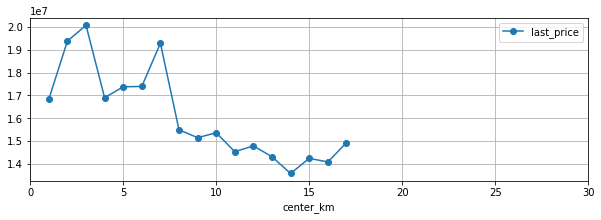

In [40]:
mean_price_km=mean_price_km.query("count>5")
mean_price_km.plot(x='center_km', y='last_price', style='o-', xlim=(0, 30), grid=True, figsize=(10, 3))
plt.show()

Разделим данные по центру и окраине питера.

In [41]:
center_of_Piterburg=st_pb[st_pb["center_km"]<7]
suburb_of_Piterburg=st_pb[st_pb["center_km"]>7]

Построим гистограммы,скатерплот, матрицу кореляций и тепловую карту для центра Питера и сравним результаты с общими показателями

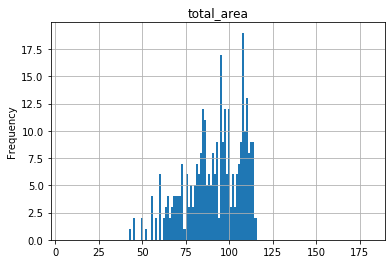

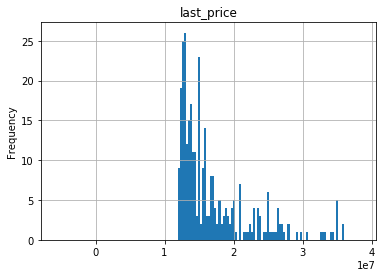

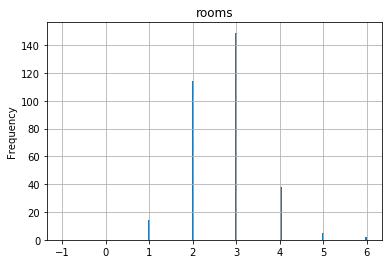

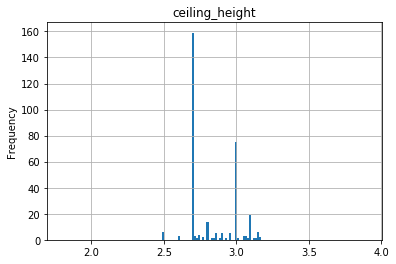

In [42]:
flat_param(center_of_Piterburg)

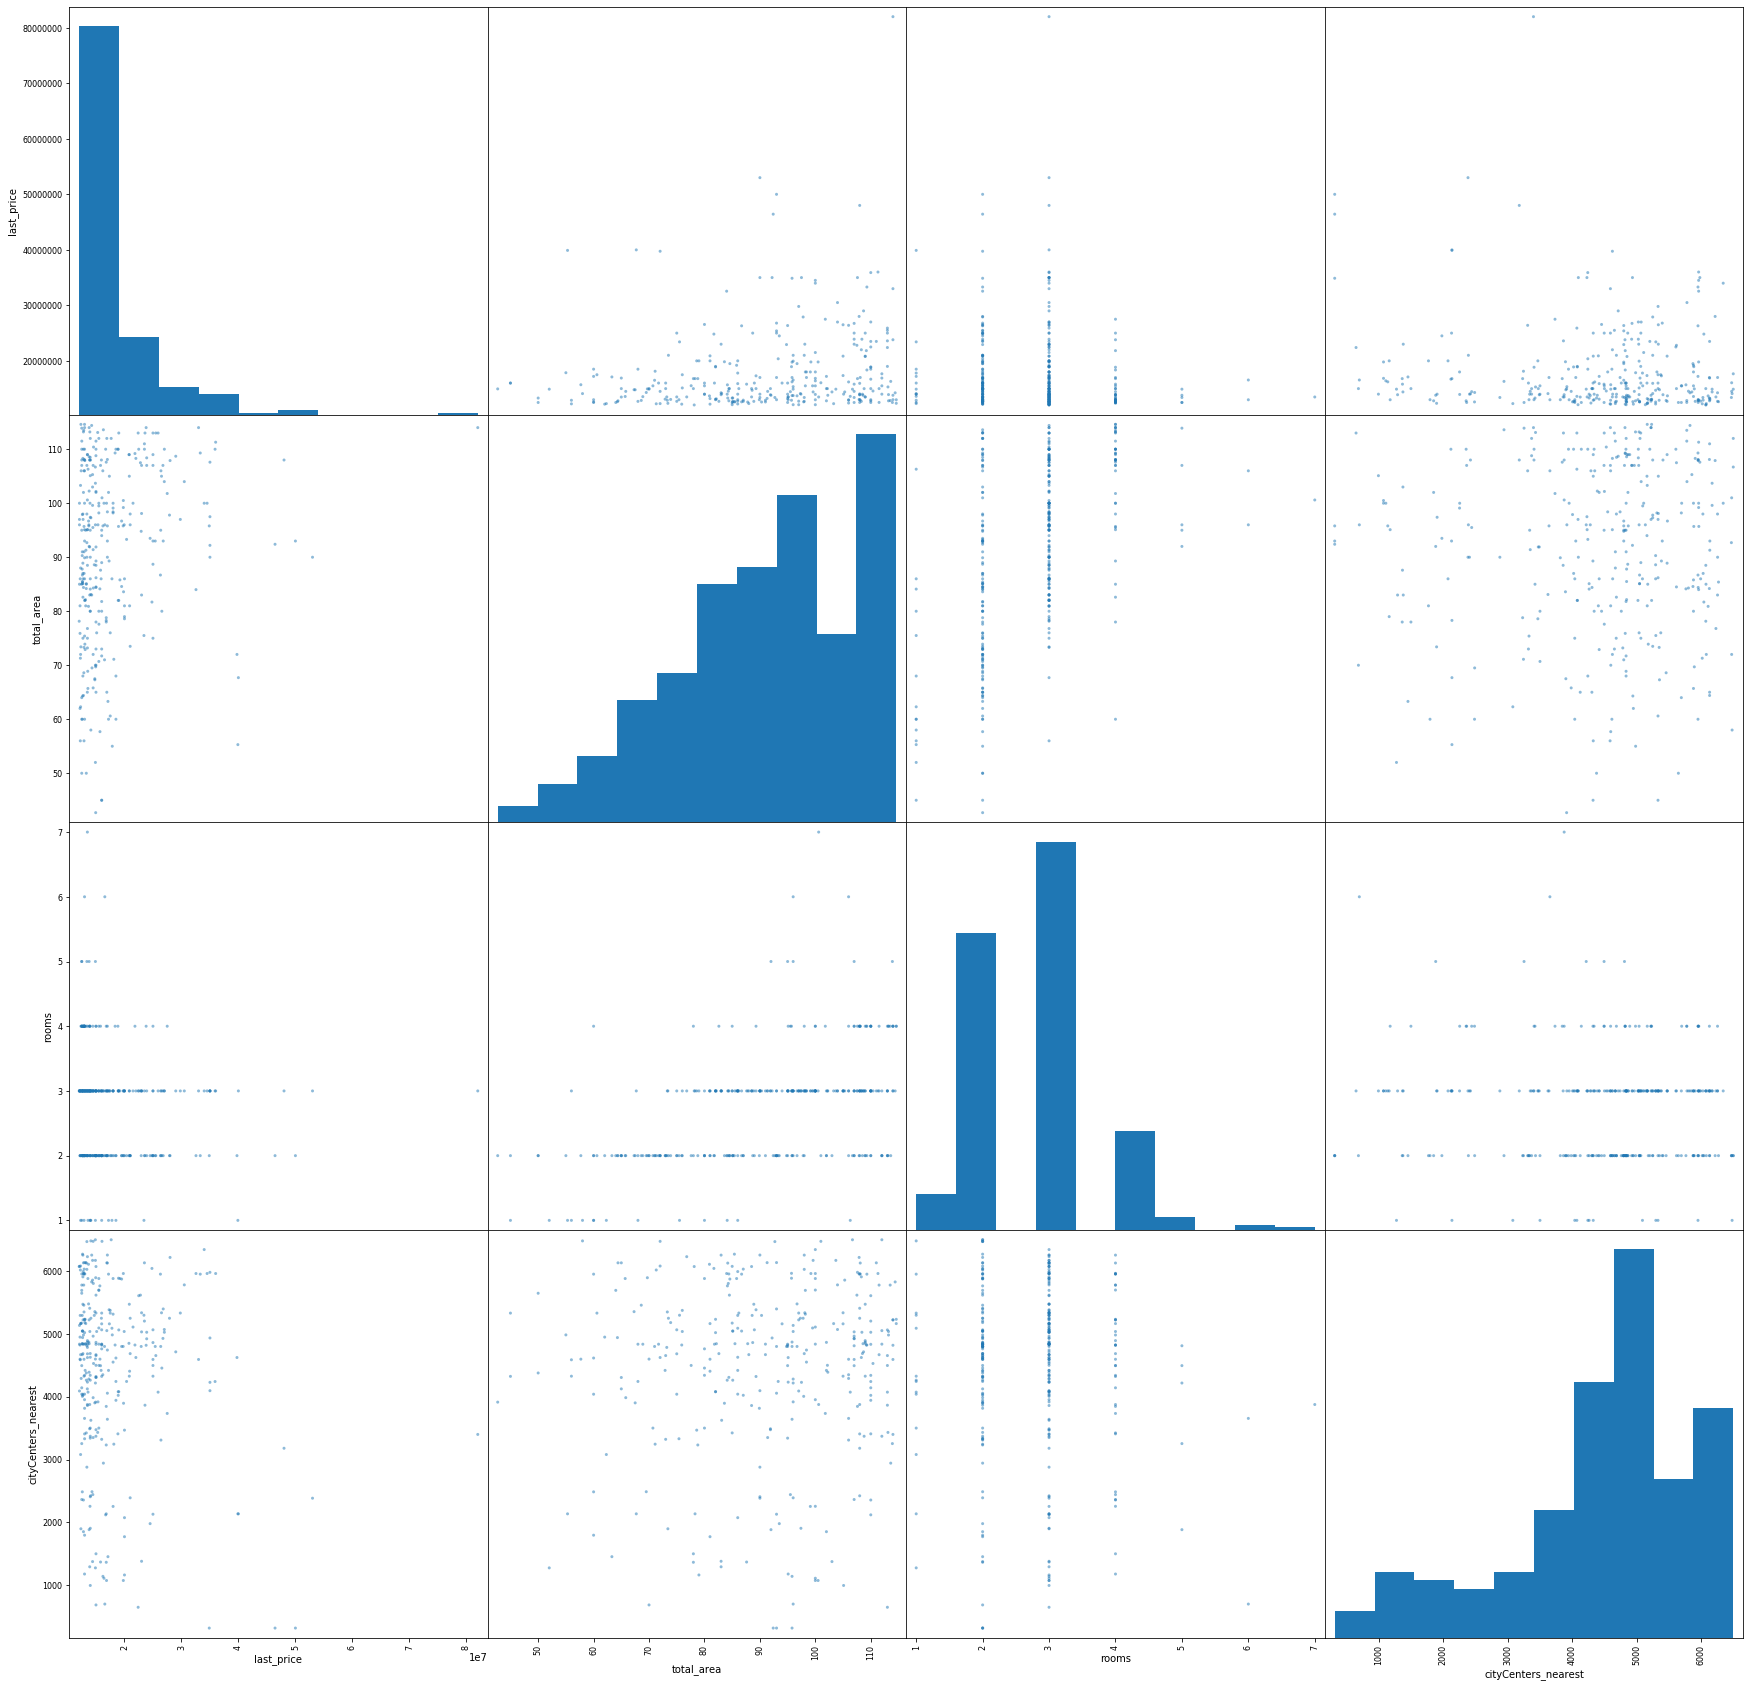

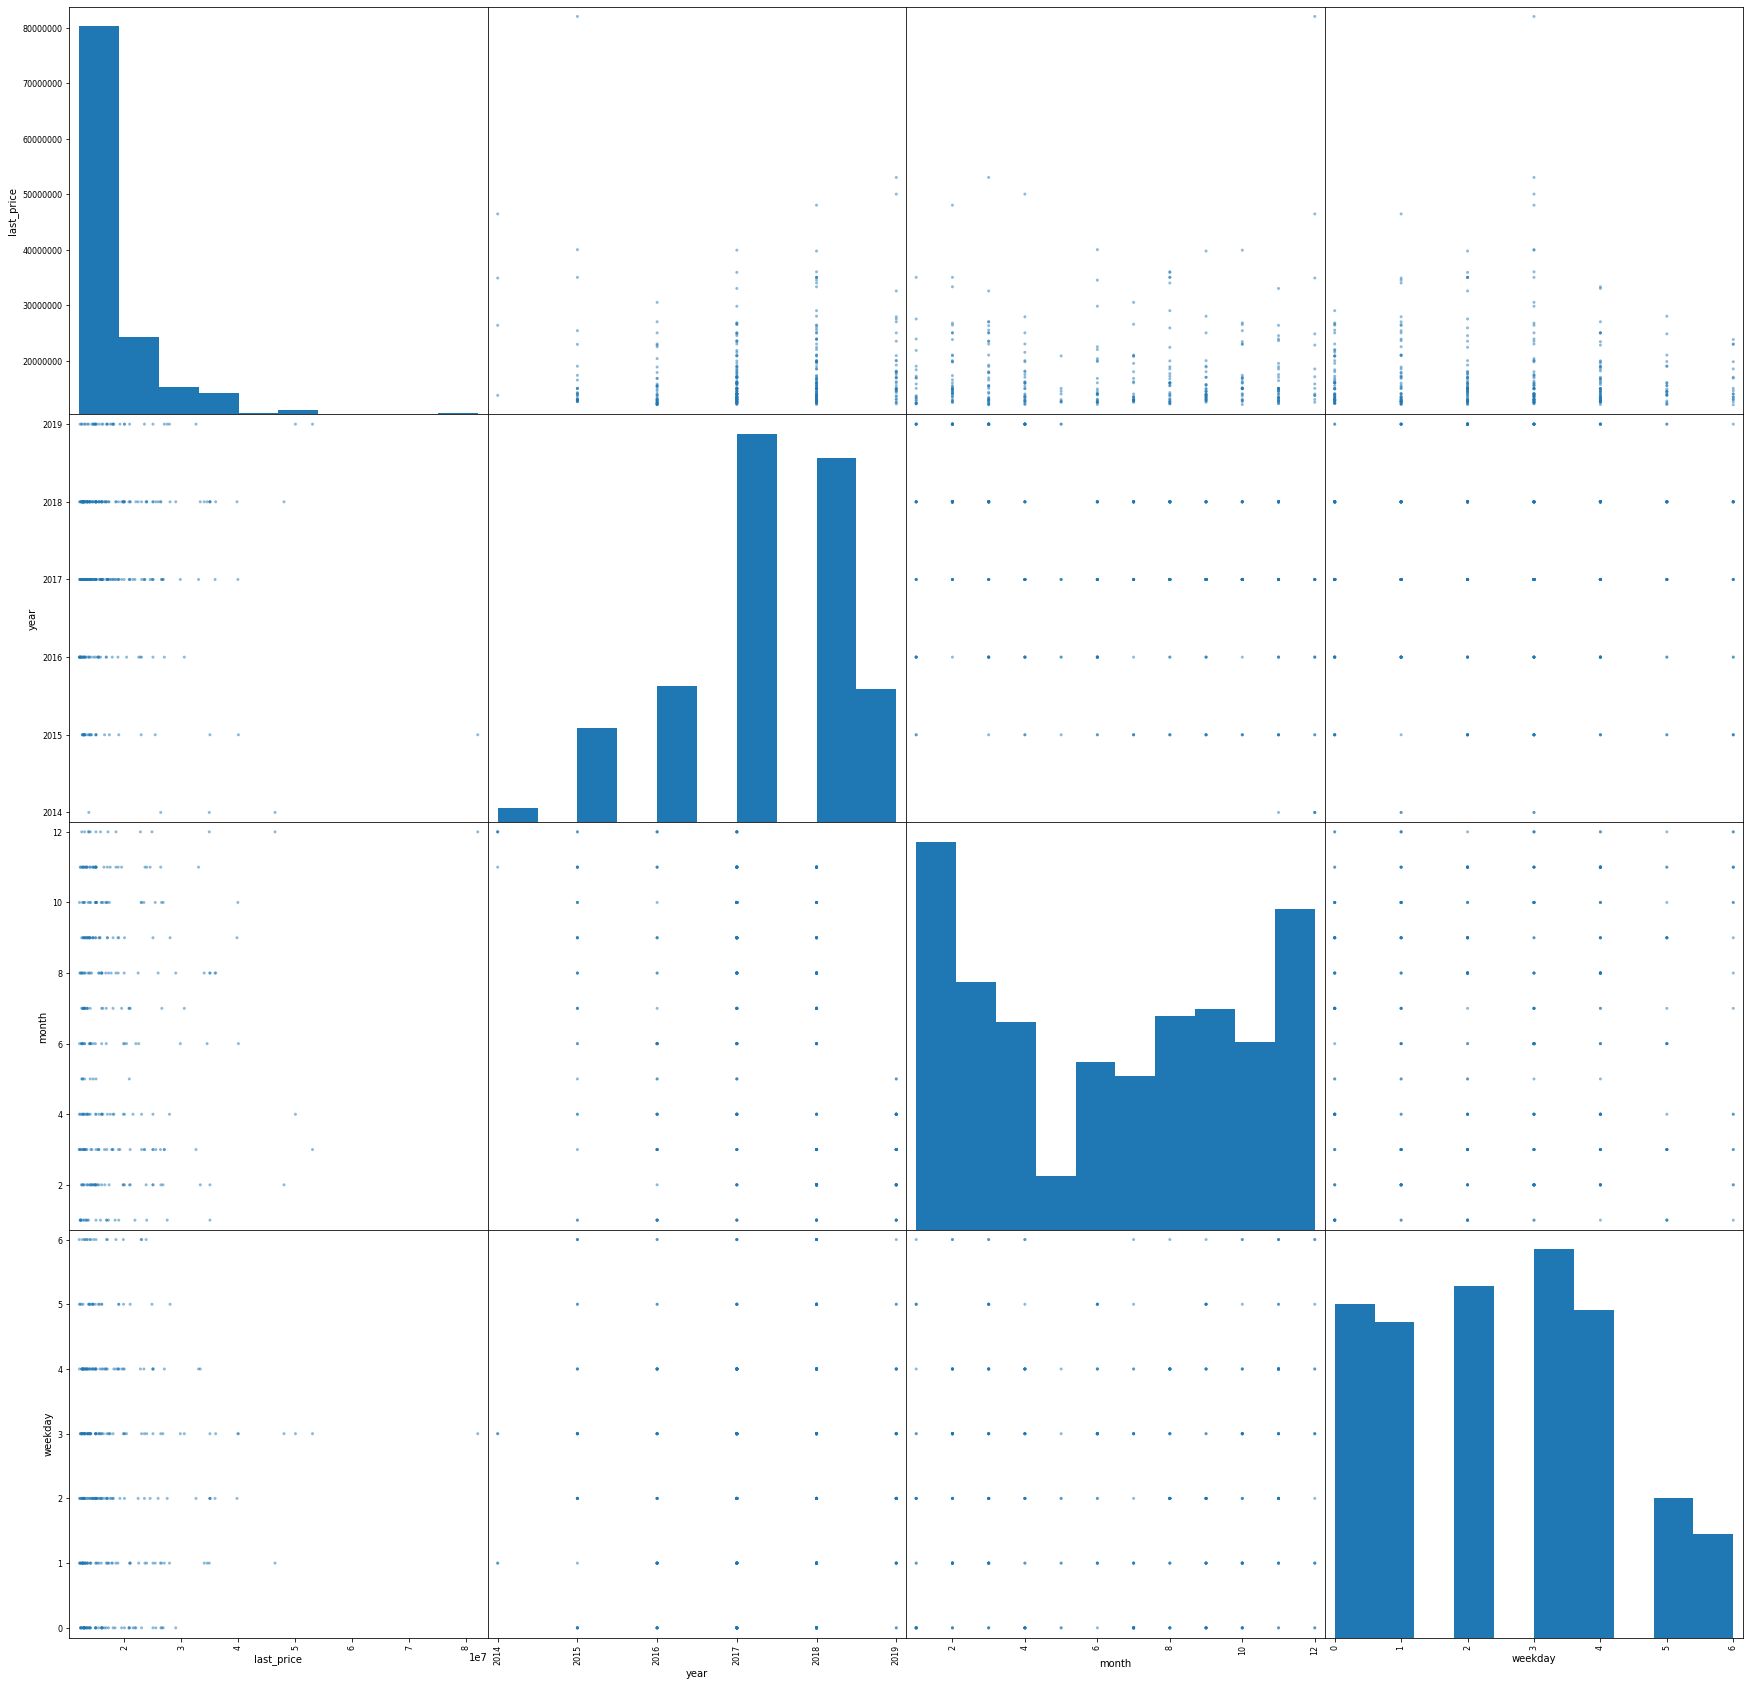

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,month,year,weekday,price_meter,living/total,kitchen/total,center_km
total_images,1.000000,0.021716,-0.006320,0.041097,0.067869,-0.031286,0.046402,-0.113086,-0.098398,NaN,...,-0.073785,0.057658,-0.055876,-0.063518,0.205614,0.007671,0.035889,0.061613,-0.054682,-0.052927
last_price,0.021716,1.000000,0.182408,-0.092720,0.134323,-0.053108,0.041853,-0.035819,0.173432,NaN,...,0.161337,-0.068576,0.102312,0.015428,0.012417,-0.021011,0.860039,-0.065779,0.078395,-0.140848
total_area,-0.006320,0.182408,1.000000,0.492559,-0.047482,-0.001223,0.566416,0.059897,0.030169,NaN,...,-0.149031,0.064075,0.173081,0.025900,-0.132485,0.016201,-0.299168,0.038258,-0.076004,0.045446
rooms,0.041097,-0.092720,0.492559,1.000000,-0.203224,-0.070128,0.778532,-0.017359,0.104062,NaN,...,-0.028876,0.074653,0.029637,0.016152,-0.086411,0.087762,-0.317528,0.626221,-0.422014,-0.045624
ceiling_height,0.067869,0.134323,-0.047482,-0.203224,1.000000,-0.070904,-0.135274,-0.018812,-0.075826,NaN,...,-0.023004,-0.089201,-0.011533,-0.080844,0.126972,0.026587,0.167126,-0.125854,0.035003,-0.025306
floors_total,-0.031286,-0.053108,-0.001223,-0.070128,-0.070904,1.000000,-0.181071,0.687011,-0.068990,NaN,...,-0.082288,0.010757,0.049937,-0.019799,-0.074250,-0.045440,-0.060165,-0.224850,0.019045,0.405772
living_area,0.046402,0.041853,0.566416,0.778532,-0.135274,-0.181071,1.000000,-0.101872,0.205582,NaN,...,-0.035732,0.045089,0.082380,0.044661,-0.109715,0.029027,-0.224207,0.834470,-0.602778,-0.129568
floor,-0.113086,-0.035819,0.059897,-0.017359,-0.018812,0.687011,-0.101872,1.000000,-0.019923,NaN,...,-0.142110,0.057704,0.014149,-0.040277,-0.050384,0.030167,-0.067554,-0.158160,-0.065796,0.249597
is_apartment,-0.098398,0.173432,0.030169,0.104062,-0.075826,-0.068990,0.205582,-0.019923,1.000000,NaN,...,0.145090,0.005107,0.241395,0.112121,-0.160930,-0.081550,0.149709,0.220321,-0.146318,-0.204985
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


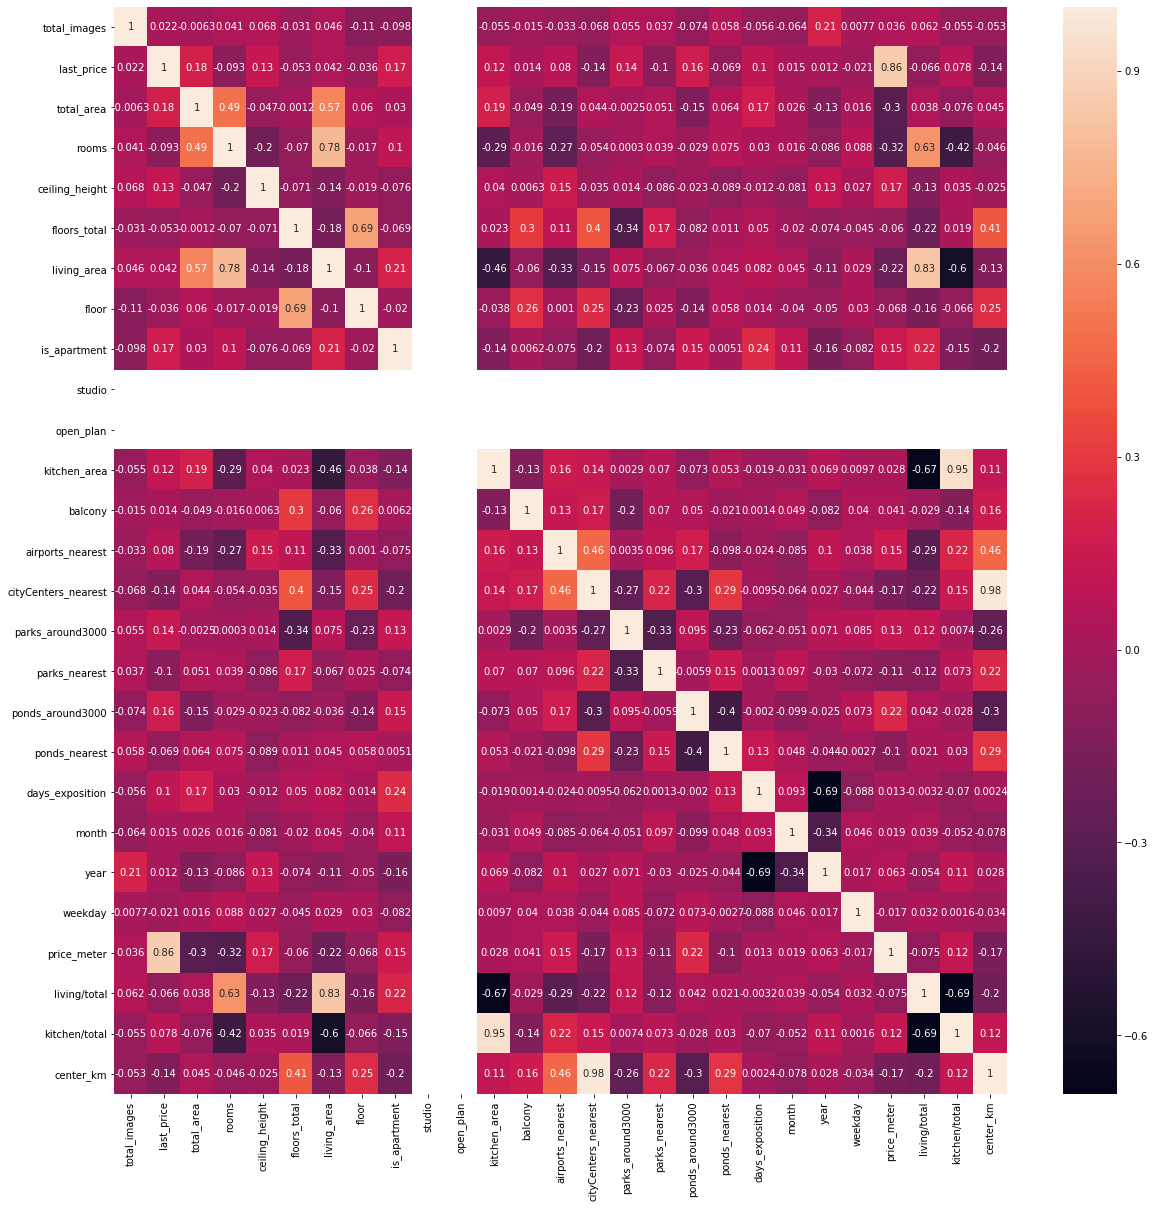

In [43]:
real_estate_param(center_of_Piterburg)

Результаты совпадают с общими.Общая площадь сильно взаимосвязана с количеством комнат и жилой зоной. Близость парков коррелирует с близостью прудов. Так же видно, что парки и пруды влияют на стоимость квартиры.

Однако в питере еще видно, как количество многоэтажек зависит от близости к центру.

Сравним данные , влияющие на цену квадратного метра в центре и на окраине Питера.

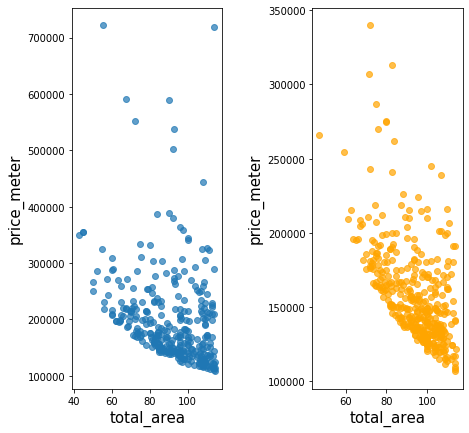

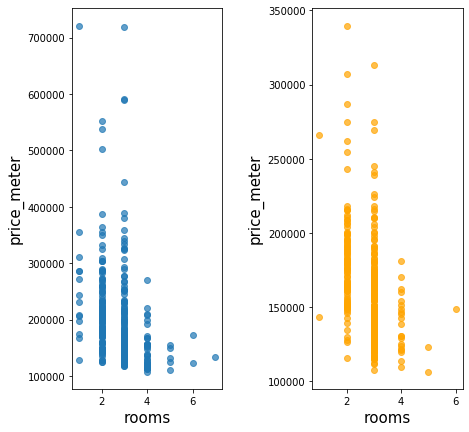

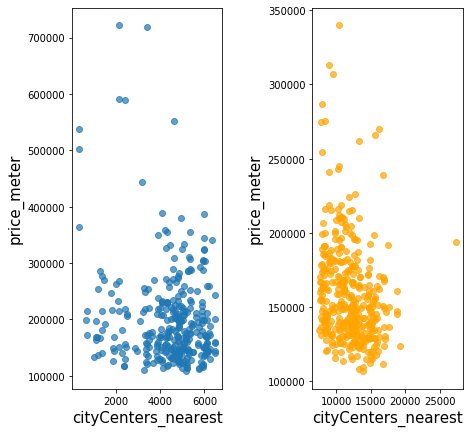

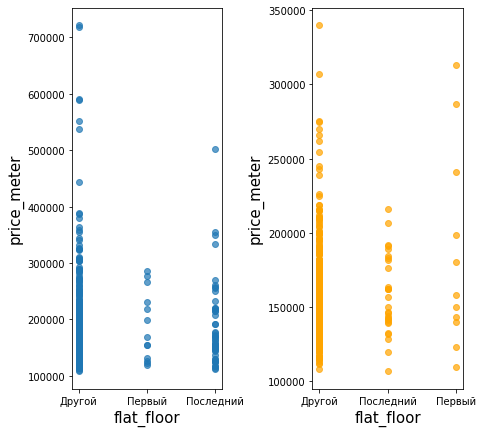

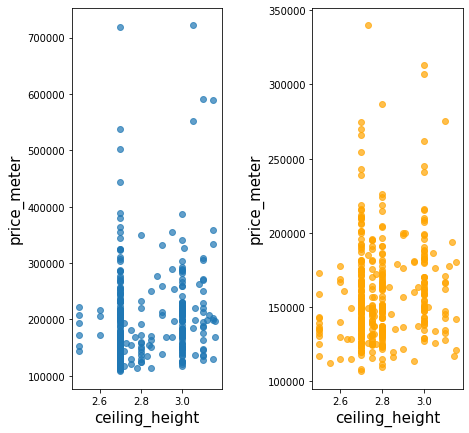

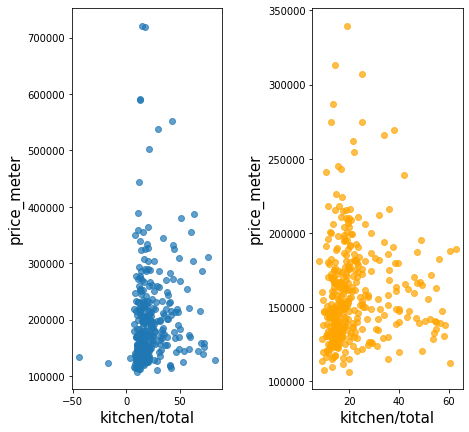

In [44]:
graf(center_of_Piterburg,suburb_of_Piterburg)

Видно, что в центре питера разброс по ценам в зависимости от метража кухни меньше. Это логично, т.к. в центре в старых домах параметры схожи.
Так же в глаза бросаются более высокие потолки в домах в центре и большее кол-во однакомнатных квартир.

<font color=green> Отличные графики, показывающие нам различия. Только стоит сделать им названия для описания того, какую информацию они несут. 
    
---

### Шаг 5. Общий вывод

 Мы рассмотрели параметры недвижимости в разных городах и проанализировали их корреляцию между собой. Отдельно был выполнен аналих недвижимости в центре питера. Из проведенной работы следуют следующие выводы:
1) Медианное значение длительности продажи равно 148 дней, а среднее 249 дня. Это логично, т.к. обычно люди принимают серьезные решения до 3 месяцев. Если предложение выделяется из рынка, то покупку совершают сразу. Если квартира эксклюзивна или имеет существенные недостатки, то продажа может затянуться.
2) Самая ликвидная недвижимость, конечно же, в Питере и Пушкине, как в крупных городских центрах.
3) Цена прямо пропорциональна общей площади. сначало зависимость линейна, но когда площадь становится настолько большой, что не вписывается в стандартные проекты, дисперсия цен многократно увеличивается. Для центра питера эта тендеция еще заметнее, ведь большая квартиры в центре северной столицы- роскошь.
4) Цена прямо пропорциональна количеству комнат. Она явно увеличивается от "однушек" к "трешкам". Далее же начинаются нестандаотные проекты, и выбросы высоких цен многократно возрастают. Такая же картина наблюдается и в центре Питера.
5)Чем ближе к центру города, тем дороже квартиры и чаще выбросы высоких цен. Однако можно заметить  небольшие островки скопления цен повыше вдали от города. Возможно, это элитные поселки вроде Рублевки или Апреливки.
6) Особенно интересно выглядит график распределения жилой площади от удаленности от центра. Основное скопление чуть в отдалениии от центра. Основные выбросы- в центре города. А на отшибе больше маленьких квартирок.
7) Вплоть до 2018 года медианная цена на недвижимость линейно росла. После кризиса 2018 года медианная цена немного упало, но очень сильно увеличилась дисперсия данных ( такое неравенство в цене говорит о расслоении населения после кризисов). В Питере же это видно еще более ярко ( после 2018 года вцентре питера нереально большой разброс цен)
8) Ярко видна сезонность спроса на недвижимость по месяцам: летом все на дачах и отпусках, а к зиме подсчитывают капитал.
9) Предложений по более высокой цене больше публиковалось посреди недели.
10) Отдельно стоит отметить особенности квартир в центре питера:
Средняя высота потолков в старых Питерских квартирах -3 метра. Когда в обычных домах в дали от центра 2.5 м.
Так же больше трехкомнатных квартир, а в городах поменьше -однакомнатных.